In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [ ]:
#   LOAD DATA
df = pd.read_csv("/content/IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# 1. HANDLE MISSING VALUES
# -------------------------------
num_cols = df.select_dtypes(include=[np.number]).columns

# Fill with mean (change mean → median if you want)
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

print("===== AFTER FILLING MISSING VALUES =====")
display(df.head())

===== AFTER FILLING MISSING VALUES =====


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [ ]:
# 2. MIN–MAX SCALING
# -------------------------------
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("===== AFTER MIN–MAX SCALING =====")
display(df.head())

===== AFTER MIN–MAX SCALING =====


,sepal_length,sepal_width,petal_length,petal_width,species
0,0.222222,0.625000,0.067797,0.041667,Iris-setosa
1,0.166667,0.416667,0.067797,0.041667,Iris-setosa
2,0.111111,0.500000,0.050847,0.041667,Iris-setosa
3,0.083333,0.458333,0.084746,0.041667,Iris-setosa
4,0.194444,0.666667,0.067797,0.041667,Iris-setosa


In [ ]:

# ================================
#   SPLIT RATIOS + K VALUES
# ================================
split_ratios = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]
k_values = [1, 3, 5, 7, 9, 11]

X = df.iloc[:, :-1]   # features
y = df.iloc[:, -1]    # target
results = []

In [ ]:
from sklearn.model_selection import train_test_split

# X = features, y = target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

split_ratios = [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]

print("===== TRAIN / TEST SPLIT OUTPUTS =====\n")

for train_size, test_size in split_ratios:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        test_size=test_size,
        random_state=42,
        shuffle=True
    )

    print(f"Split Ratio: {int(train_size*100)} / {int(test_size*100)}")
    print(f"X_train shape: {X_train.shape}")
    print(f"X_test shape:  {X_test.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"y_test shape:  {y_test.shape}")
    print("--------------------------------------")


===== TRAIN / TEST SPLIT OUTPUTS =====

Split Ratio: 50 / 50
X_train shape: (75, 4)
X_test shape:  (75, 4)
y_train shape: (75,)
y_test shape:  (75,)
--------------------------------------
Split Ratio: 60 / 40
X_train shape: (90, 4)
X_test shape:  (60, 4)
y_train shape: (90,)
y_test shape:  (60,)
--------------------------------------
Split Ratio: 70 / 30
X_train shape: (105, 4)
X_test shape:  (45, 4)
y_train shape: (105,)
y_test shape:  (45,)
--------------------------------------
Split Ratio: 80 / 20
X_train shape: (120, 4)
X_test shape:  (30, 4)
y_train shape: (120,)
y_test shape:  (30,)
--------------------------------------


In [ ]:
# ================================
#   TRAIN & TEST FOR EACH SETTING
# ================================
for train_size, test_size in split_ratios:
    for k in k_values:
        # Split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, train_size=train_size, test_size=test_size, random_state=42, shuffle=True
        )

        # Model
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred, average="macro")
        rec = recall_score(y_test, y_pred, average="macro")
        f1 = f1_score(y_test, y_pred, average="macro")
        cm = confusion_matrix(y_test, y_pred)

        results.append({
            "train_size": train_size,
            "test_size": test_size,
            "k": k,
            "accuracy": acc,
            "precision": prec,
            "recall": rec,
            "f1_score": f1,
            "confusion_matrix": cm
        })

In [ ]:
# ================================
#   FIND THE BEST SETTINGS
# ================================
results_df = pd.DataFrame([
    {
        "train_size": r["train_size"],
        "test_size": r["test_size"],
        "k": r["k"],
        "accuracy": r["accuracy"],
        "precision": r["precision"],
        "recall": r["recall"],
        "f1_score": r["f1_score"]
    }
    for r in results
])

best = results_df.iloc[results_df["f1_score"].idxmax()]

print("===== SUMMARY OF ALL RESULTS =====")
display(results_df)

print("\n===== BEST CONFIGURATION =====")
print(best)

===== SUMMARY OF ALL RESULTS =====


,train_size,test_size,k,accuracy,precision,recall,f1_score
0,0.5,0.5,1,0.986667,0.986111,0.985507,0.985500
1,0.5,0.5,3,0.986667,0.986111,0.985507,0.985500
2,0.5,0.5,5,0.986667,0.986111,0.985507,0.985500
3,0.5,0.5,7,0.986667,0.986111,0.985507,0.985500
4,0.5,0.5,9,0.973333,0.973333,0.971014,0.970960
5,0.5,0.5,11,0.986667,0.986111,0.985507,0.985500
6,0.6,0.4,1,0.983333,0.983333,0.981481,0.981929
7,0.6,0.4,3,0.983333,0.983333,0.981481,0.981929
8,0.6,0.4,5,0.983333,0.983333,0.981481,0.981929
9,0.6,0.4,7,0.983333,0.983333,0.981481,0.981929



===== BEST CONFIGURATION =====
train_size    0.7
test_size     0.3
k             1.0
accuracy      1.0
precision     1.0
recall        1.0
f1_score      1.0
Name: 12, dtype: float64


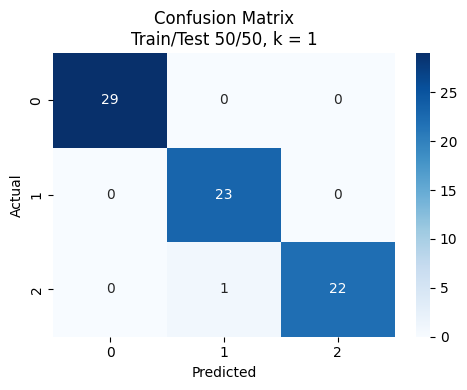

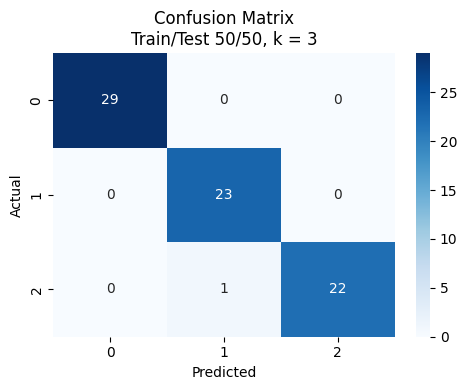

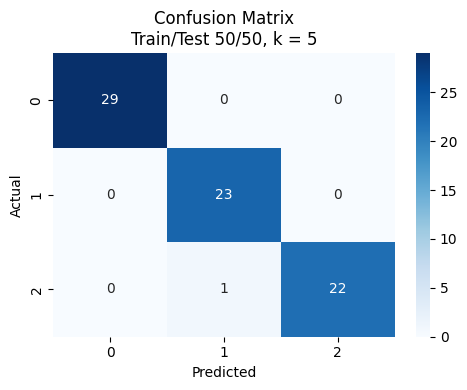

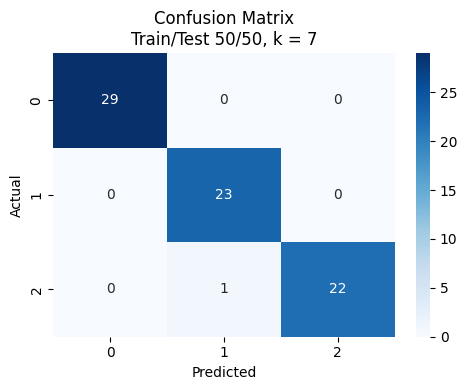

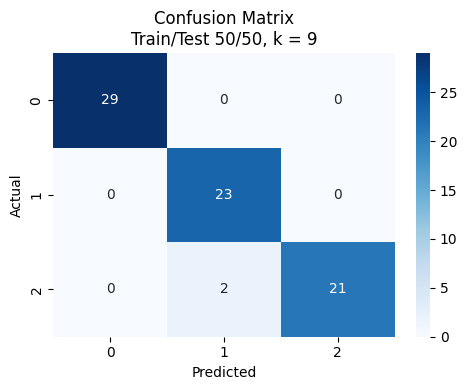

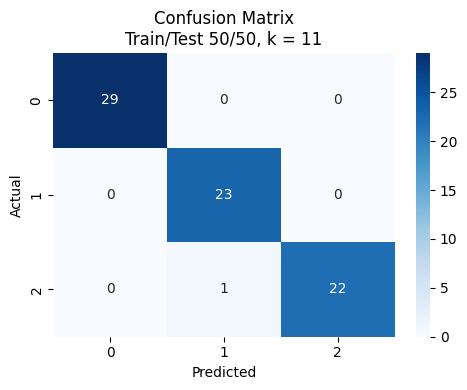

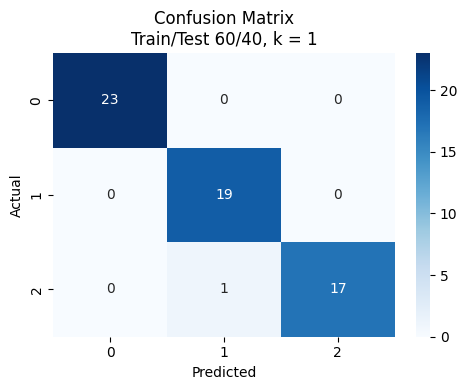

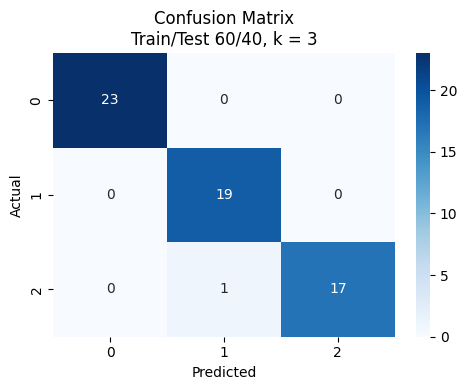

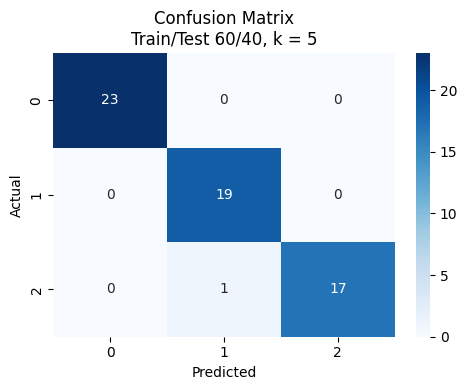

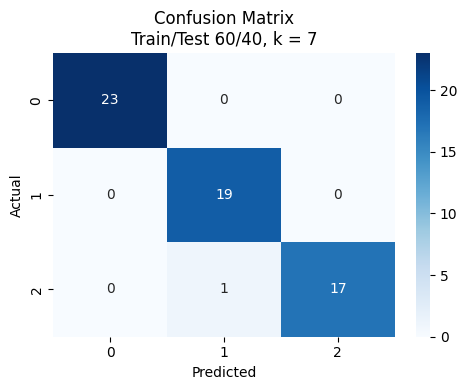

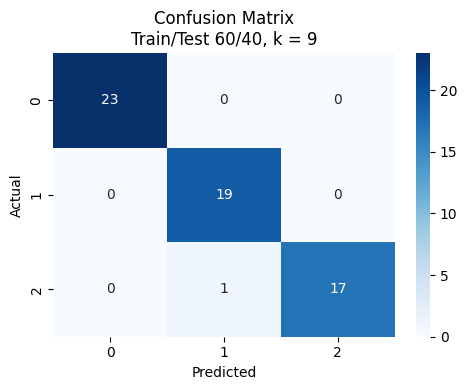

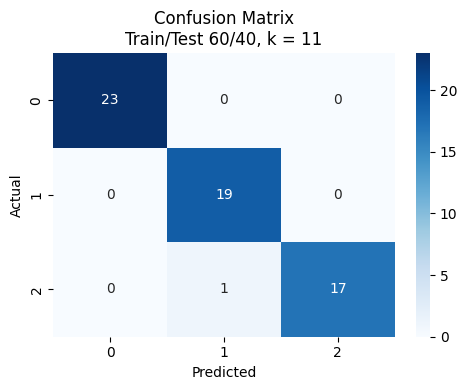

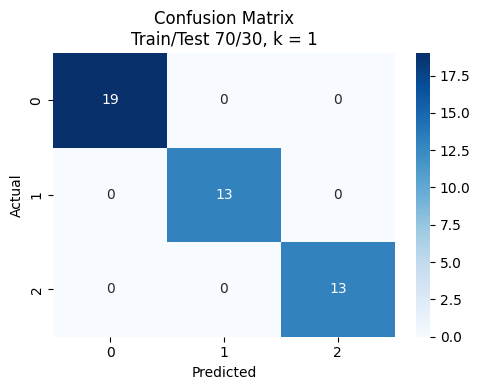

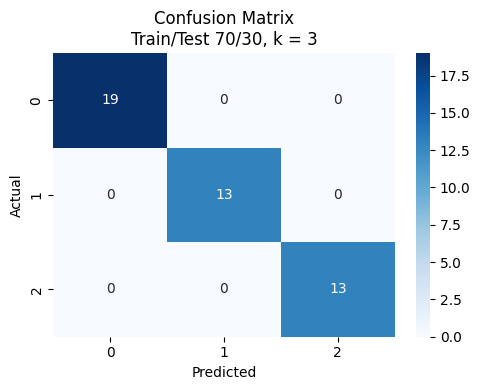

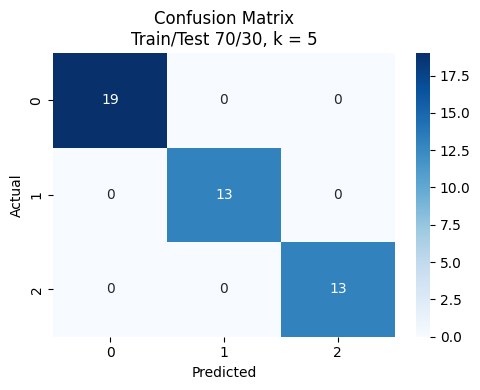

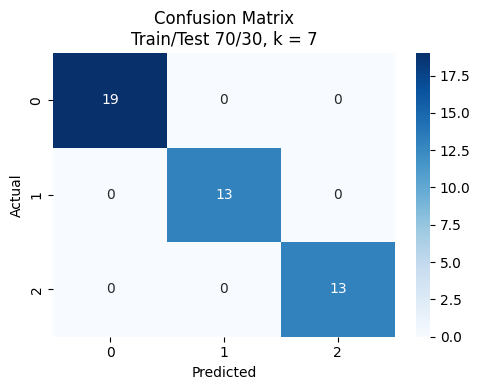

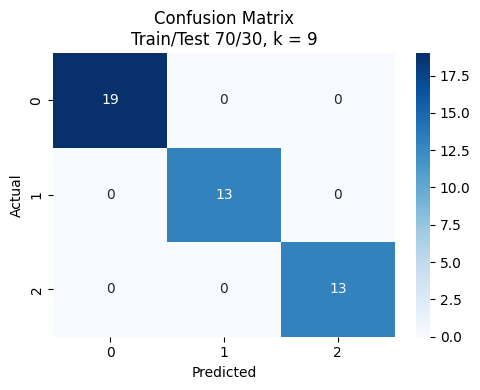

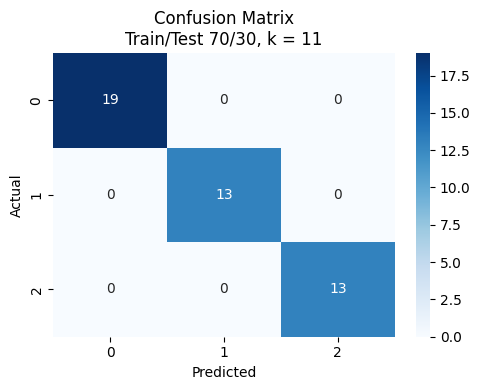

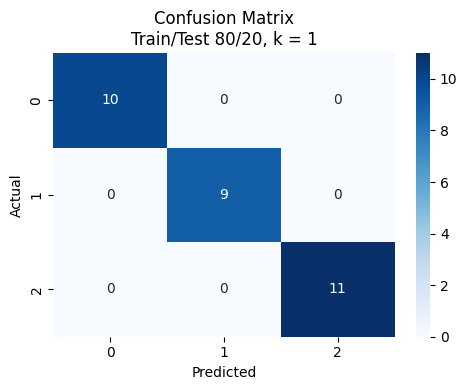

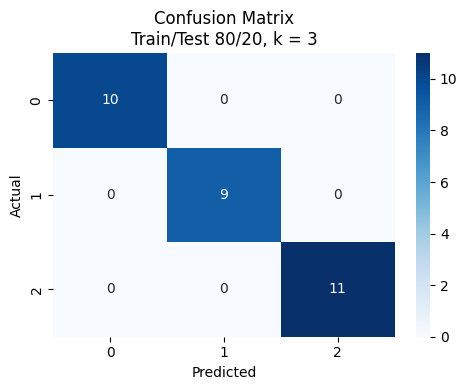

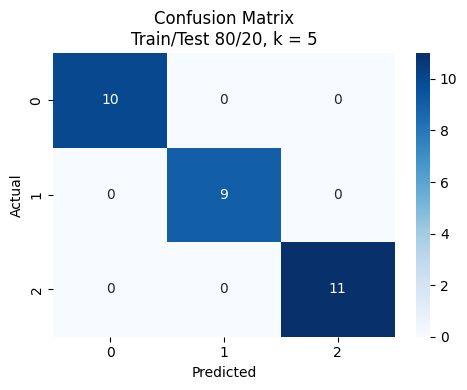

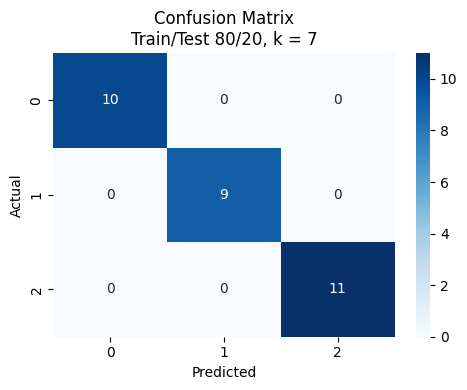

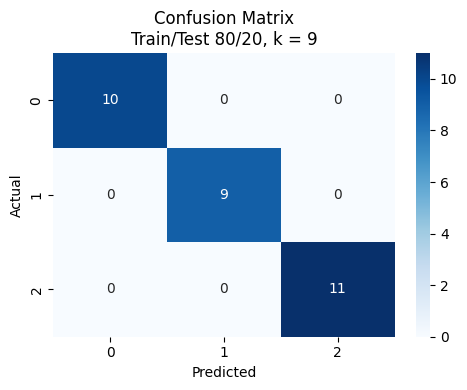

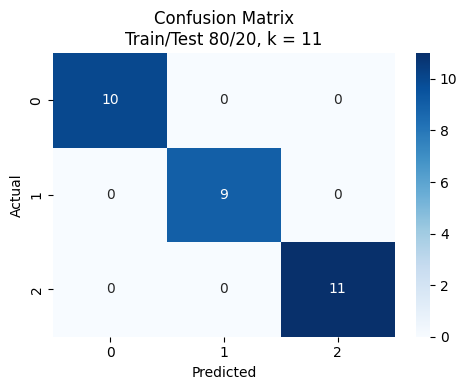

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize confusion matrices
for r in results:
    plt.figure(figsize=(5,4))
    sns.heatmap(r["confusion_matrix"], annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix\nTrain/Test {int(r['train_size']*100)}/{int(r['test_size']*100)}, k = {r['k']}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


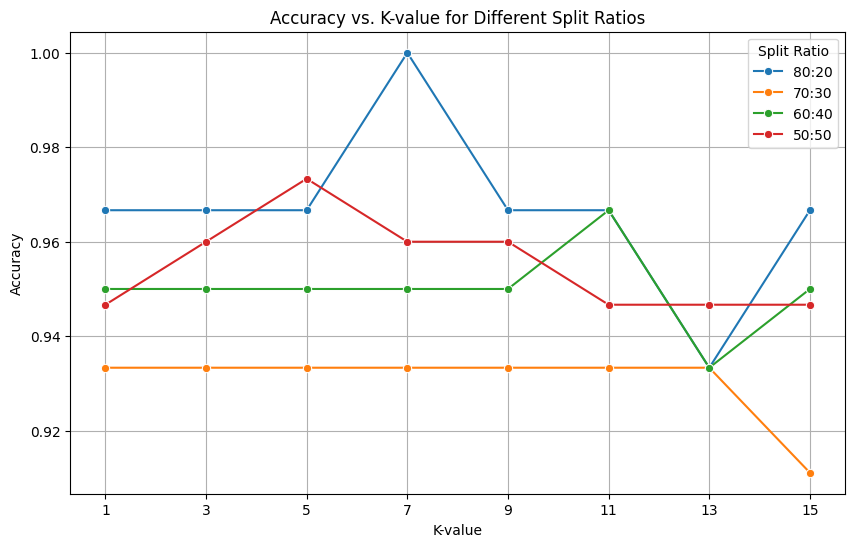

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=results_df, x='k', y='Accuracy', hue='Split', marker='o')
plt.title('Accuracy vs. K-value for Different Split Ratios')
plt.xlabel('K-value')
plt.ylabel('Accuracy')
plt.xticks(results_df['k'].unique())
plt.grid(True)
plt.legend(title='Split Ratio')
plt.show()
